In [ ]:
import pandas as pd
import numpy as np
import seaborn 

df = seaborn.load_dataset("iris")
df_missing = df.copy()

df_missing.iloc[0:5, 0] = np.nan
df_missing.iloc[10:15, 1] = np.nan

print(df_missing.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           NaN          3.5           1.4          0.2  setosa
1           NaN          3.0           1.4          0.2  setosa
2           NaN          3.2           1.3          0.2  setosa
3           NaN          3.1           1.5          0.2  setosa
4           NaN          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [2]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df_missing[["sepal_length", "sepal_width"]] = imputer.fit_transform(
    df_missing[["sepal_length", "sepal_width"]]
)

print(df_missing.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0      5.877241          3.5           1.4          0.2  setosa
1      5.877241          3.0           1.4          0.2  setosa
2      5.877241          3.2           1.3          0.2  setosa
3      5.877241          3.1           1.5          0.2  setosa
4      5.877241          3.6           1.4          0.2  setosa
5      5.400000          3.9           1.7          0.4  setosa
6      4.600000          3.4           1.4          0.3  setosa
7      5.000000          3.4           1.5          0.2  setosa
8      4.400000          2.9           1.4          0.2  setosa
9      4.900000          3.1           1.5          0.1  setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_missing["species_encoded"] = le.fit_transform(df_missing["species"])

print(df_missing[["species", "species_encoded"]].head())

  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df_missing[numeric_cols] = scaler.fit_transform(df_missing[numeric_cols])

print(df_missing.head())

   sepal_length  sepal_width  petal_length  petal_width species  \
0           0.0     1.075672     -1.340227    -1.315444  setosa   
1           0.0    -0.105937     -1.340227    -1.315444  setosa   
2           0.0     0.366706     -1.397064    -1.315444  setosa   
3           0.0     0.130384     -1.283389    -1.315444  setosa   
4           0.0     1.311993     -1.340227    -1.315444  setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


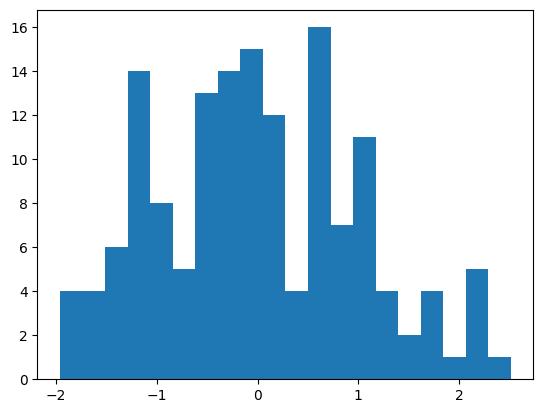

In [5]:
import matplotlib.pyplot as plt

plt.hist(df_missing["sepal_length"], bins=20)
plt.show()

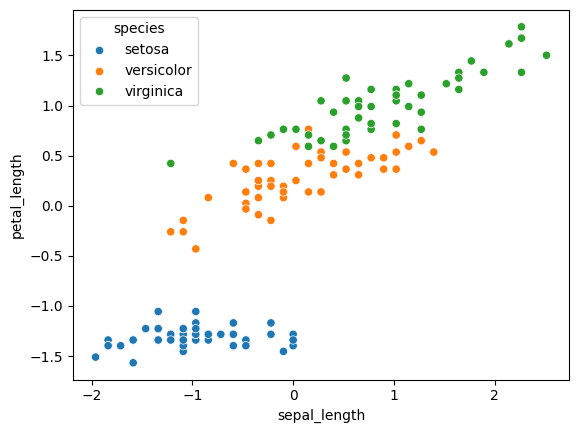

In [6]:
import seaborn 

seaborn.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df_missing)
plt.show()

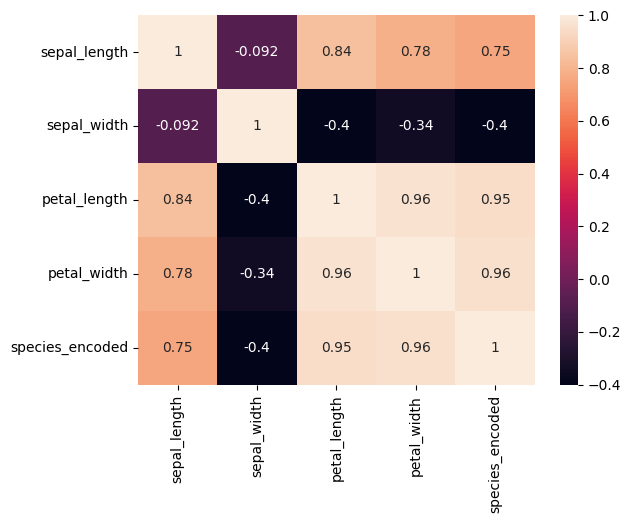

In [7]:
numeric_df = df_missing.select_dtypes(include=['float64','int64'])

seaborn.heatmap(numeric_df.corr(), annot=True)
plt.show()
